     index     value language      dataset
0        0  0.509890       en  en_example1
1        1  0.555056       en  en_example1
2        2  0.476000       en  en_example1
3        3  0.459406       en  en_example1
4        4  0.407407       en  en_example1
..     ...       ...      ...          ...
298    194  0.593333       en  en_example2
299    195  0.456954       en  en_example2
300    196  0.626667       en  en_example2
301    197  0.525974       en  en_example2
302    198  0.566667       en  en_example2

[303 rows x 4 columns]


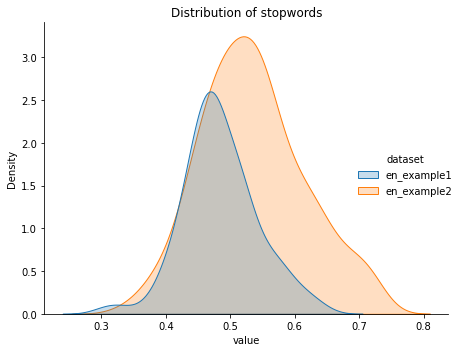

In [18]:
"""Distribution of stopwords between two datasets"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path1 = 'results/en_example1_en_stopwords.csv'
data_path2 = 'results/en_example2_en_stopwords.csv'

data_df1 = pd.read_csv(data_path1)
data_df2 = pd.read_csv(data_path2)

plot_df = pd.concat([data_df1, data_df2]).reset_index()
print(plot_df)
ax = sns.displot(plot_df, x="value", kind="kde", hue='dataset', fill=True, legend=True)
ax.set(title=f'Distribution of stopwords')
plt.tight_layout()
plt.savefig(f'stopword_dis.png')
plt.show()

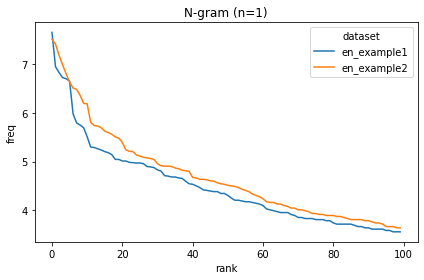

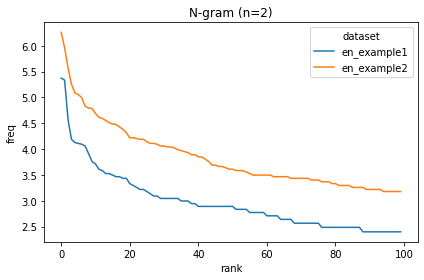

In [19]:
"""Zipf law of two datasets"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_N = 100
data_path1 = 'results/en_example1_en_zipflaw.csv'
data_path2 = 'results/en_example2_en_zipflaw.csv'

data_df1 = pd.read_csv(data_path1)
data_df2 = pd.read_csv(data_path2)

n_grams = sorted(set(data_df1['n_gram'].values))

for n_gram in n_grams:
    plot_df = pd.concat([data_df1[data_df1['n_gram']==n_gram][:top_N], data_df2[data_df2['n_gram']==n_gram][:top_N]]).reset_index()
    ax = sns.lineplot(data=plot_df, x="rank", y="freq", hue="dataset")
    ax.set(title=f'N-gram (n={n_gram})')
    plt.tight_layout()
    plt.savefig(f'zipflaw-top{top_N}-{n_gram}_gram.png')
    plt.show()

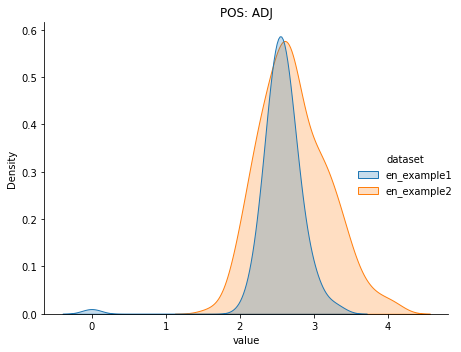

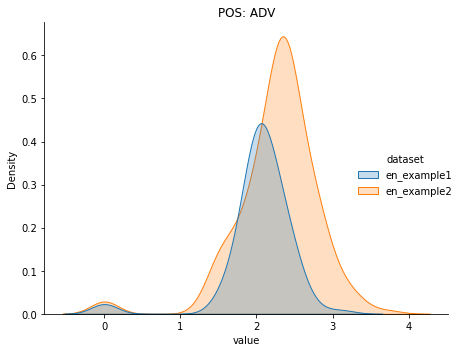

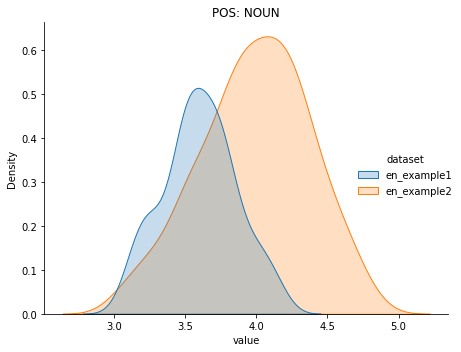

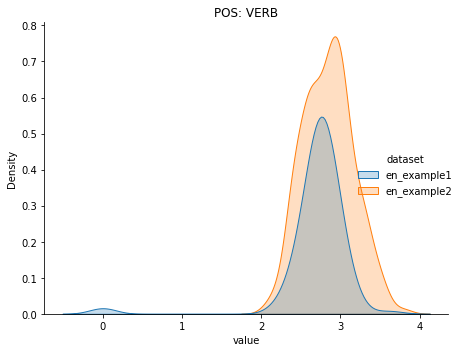

In [21]:
"""Distribution of concretness between two datasets"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path1 = 'results/en_example1_en_concreteness.csv'
data_path2 = 'results/en_example2_en_concreteness.csv'

data_df1 = pd.read_csv(data_path1)
data_df2 = pd.read_csv(data_path2)

plot_df = pd.concat([data_df1, data_df2]).reset_index()

pos_list = sorted(set(plot_df['pos'].values))

for pos in pos_list:
    ax = sns.displot(plot_df[plot_df['pos']==pos], x="value", kind="kde", hue='dataset', fill=True, legend=True)
    ax.set(title=f'POS: {pos}')
    plt.tight_layout()
    plt.savefig(f'Concretness_{pos}.png')
    plt.show()